# Analiza podatkov o knjigah

In [110]:
import pandas as pd
knjige = pd.read_csv("knjige.csv", index_col="id knjige", dtype={"datum objave": "Int64", "stevilo prenosov": "Int64"})
pd.options.display.max_rows = 20

## Splošni podatki

In [111]:
knjige[["naslov", "stevilo prenosov"]]

,naslov,stevilo prenosov
id knjige,,
2641,A Room with a View,118526
2701,"Moby Dick; Or, The Whale",114314
17157,Gulliver's Travels into Several Remote Regions...,92823
84,"Frankenstein; Or, The Modern Prometheus",91683
100,The Complete Works of William Shakespeare,90742
...,...,...
1635,Ion,2002
39784,Mother Goose's Nursery RhymesA Collection of A...,2000
8601,The Early Poems of Alfred Lord Tennyson,1998


Letos objavljene knjige.

In [112]:
knjige[knjige["datum objave"]==2025]

,naslov,jezik,datum objave,stevilo prenosov,tezavnost
id knjige,,,,,
75201,A farewell to arms,English,2025,14967,95.8
75859,The intelligent woman's guide to socialism and...,English,2025,13022,56.3
75397,Der Skorpion. Band 1,German,2025,12987,84.1
75279,"The ugly-girl papers : or, Hints for the toilet",English,2025,12930,69.8
76008,Woman—through a man's eyeglass,English,2025,12597,60.5
76051,The strike of a sex : A novel.,English,2025,12330,65.8
75425,Portuguese literature,English,2025,4251,60.2
76503,The man who mastered time,English,2025,3516,NaN
76463,Bog-trotting for orchids,English,2025,3049,NaN


In [113]:
osebe = pd.read_csv("osebe.csv", index_col="id osebe")
osebe_knjige = pd.read_csv("osebe_knjige.csv", index_col="id osebe")


Vsi avtorji:

In [114]:
avtorji = pd.merge(osebe, osebe_knjige[osebe_knjige["vloga"] == "A"], left_on="id osebe", right_on="id osebe")
avtorji

,oseba,id knjige,vloga
id osebe,,,
975,"Forster, E. M. (Edward Morgan), 1879-1970",2641,A
975,"Forster, E. M. (Edward Morgan), 1879-1970",61221,A
9,"Melville, Herman, 1819-1891",2701,A
9,"Melville, Herman, 1819-1891",11231,A
9,"Melville, Herman, 1819-1891",15,A
...,...,...,...
36232,"Ellwanger, William De Lancey, 1854-1913",33144,A
41908,"Pigafetta, Antonio, 1480?-1534?",42884,A
2987,"Tennyson, Alfred Tennyson, Baron, 1809-1892",8601,A


Vsi prevajalci:

In [115]:
prevajalci = pd.merge(osebe, osebe_knjige[osebe_knjige["vloga"] == "P"], left_on="id osebe", right_on="id osebe")
prevajalci

,oseba,id knjige,vloga
id osebe,,,
2877,"Wall, Charles Heron",9070,P
2858,"Garnett, Constance, 1861-1946",2554,P
2858,"Garnett, Constance, 1861-1946",13415,P
2858,"Garnett, Constance, 1861-1946",28054,P
2858,"Garnett, Constance, 1861-1946",36034,P
...,...,...,...
760,"Giles, J. A. (John Allen), 1808-1884",657,P
45796,"Auden, H. W. (Henry William), 1867-1940",50280,P
38094,"Bennett, Hannaford, 1867-1946",76493,P


Vsi ilustratorji:

In [116]:
ilustratorji = pd.merge(osebe, osebe_knjige[osebe_knjige["vloga"] == "I"], left_on="id osebe", right_on="id osebe")
ilustratorji

,oseba,id knjige,vloga
id osebe,,,
26815,"Brock, C. E. (Charles Edmund), 1870-1938",394,I
6202,"Merrill, Frank T., 1848-1923",37106,I
4488,"Ralph, Lester",8525,I
53048,"Forte, John R. (John Robert), 1918-1966",64820,I
53048,"Forte, John R. (John Robert), 1918-1966",22629,I
...,...,...,...
32544,"Gage, George W., 1887-1957",76493,I
31359,"Gilbert, John, 1817-1897",39784,I
7195,"Crane, Walter, 1845-1915",39784,I


In [117]:
nemske = knjige[knjige["jezik"]=="German" ]
nemske

,naslov,jezik,datum objave,stevilo prenosov,tezavnost
id knjige,,,,,
24571,Der Struwwelpeteroder lustige Geschichten und ...,German,2008,49663,81.9
22367,Die Verwandlung,German,2007,27074,69.5
17161,Max und Moritz: Eine Bubengeschichte in sieben...,German,2005,25528,83.5
43438,Erotika Biblion,German,2013,25017,65.6
75397,Der Skorpion. Band 1,German,2025,12987,84.1
51221,Geschlecht und Charakter: Eine prinzipielle Un...,German,2016,12796,55.7
14075,Die Frauenfrage: ihre geschichtliche Entwicklu...,German,2004,12791,55.6
35605,Manor,German,2011,12438,86.9
58804,"Die Deutschen Familiennamen, geschichtlich, ge...",German,2019,2537,69.0


Združeni osnovni podatki knjig in ustvarjalcev.

In [118]:
osebe_p = pd.merge(osebe_knjige, osebe, left_on="id osebe", right_on="id osebe")
povezano = pd.merge(osebe_p, knjige, left_on="id knjige", right_on="id knjige")
povezano 

,id knjige,vloga,oseba,naslov,jezik,datum objave,stevilo prenosov,tezavnost
0,2641,A,"Forster, E. M. (Edward Morgan), 1879-1970",A Room with a View,English,2001,118526,84.8
1,2701,A,"Melville, Herman, 1819-1891","Moby Dick; Or, The Whale",English,2001,114314,73.3
2,17157,A,"Swift, Jonathan, 1667-1745",Gulliver's Travels into Several Remote Regions...,English,2005,92823,65.5
3,84,A,"Shelley, Mary Wollstonecraft, 1797-1851","Frankenstein; Or, The Modern Prometheus",English,1993,91683,65.0
4,100,A,"Shakespeare, William, 1564-1616",The Complete Works of William Shakespeare,English,1994,90742,83.0
...,...,...,...,...,...,...,...,...
1067,39784,I,"Zwecker, Johann Baptist, 1814-1876",Mother Goose's Nursery RhymesA Collection of A...,English,2012,2000,86.8
1068,8601,A,"Tennyson, Alfred Tennyson, Baron, 1809-1892",The Early Poems of Alfred Lord Tennyson,English,2005,1998,75.6
1069,27638,A,United States. Central Intelligence Agency,The 2001 CIA World Factbook,English,2008,1996,47.7
1070,14472,A,"Harman, Thomas T.",Showell's Dictionary of BirminghamA History an...,English,2004,1993,67.0


## Analiza žanrov

In [119]:
zanri_k = pd.read_csv("zanri_knjige.csv", index_col="id zanra")

Tabela je prikaz povezave med osnovnimi podatki o knjigah in žanri.

In [120]:
zanri = pd.read_csv("zanri.csv") 

# zanri in zanri_knjige
zanri_p = pd.merge(zanri_k, zanri, left_on="id zanra", right_on="id zanra")

# povezano s knjigami
skupaj = pd.merge(zanri_p, knjige, left_on="id zanra", right_on="id knjige") 
skupaj

,id zanra,id knjige,zanr,naslov,jezik,datum objave,stevilo prenosov,tezavnost
0,11,2701,Whaling -- Fiction,Alice's Adventures in Wonderland,English,2008,61413,87.5
1,36,84,Science fiction,The War of the Worlds,English,2004,30815,77.8
2,141,289,Animals -- Fiction,Mansfield Park,English,1994,40270,66.3
3,36,18857,Science fiction,The War of the Worlds,English,2004,30815,77.8
4,6593,18857,Earth (Planet) -- Core -- Fiction,"History of Tom Jones, a Foundling",English,2004,77337,58.0
...,...,...,...,...,...,...,...,...
236,10,27558,"Geography -- Handbooks, manuals, etc.",NaN,NaN,<NA>,<NA>,NaN
237,657,1564,"Johnson, Samuel, 1709-1784",The Anglo-Saxon Chronicle,English,1996,2069,72.7
238,2610,700,Gamblers -- Fiction,Notre-Dame de Paris,English,2001,28284,78.5
239,2542,883,Poor families -- Fiction,A Doll's House : a play,English,2001,52914,86.6


Najbolj pogosti žanri:

In [121]:
skupaj.groupby("zanr")["id knjige"].count().sort_values(ascending=False)

zanr
Science fiction                                                  142
Fairy tales                                                        7
Holmes, Sherlock (Fictitious character) -- Fiction                 6
Women -- Fiction                                                   5
Poor families -- Fiction                                           5
                                                                ... 
Sailors -- Fiction                                                 1
Will                                                               1
Women -- Suffrage -- United States -- History -- 19th century      1
Women authors -- Fiction                                           1
Women immigrants -- Fiction                                        1
Name: id knjige, Length: 52, dtype: int64

## Podatki o težavnosti knjig

Prva tabela spodaj prikazuje vse lahke, druga pa težke knjige, sortirane glede na njihovo težavnost.

In [122]:
lahke_knjige = knjige[knjige["tezavnost"] <= 50.0]
lahke_knjige

,naslov,jezik,datum objave,stevilo prenosov,tezavnost
id knjige,,,,,
1080,A Modest ProposalFor preventing the children o...,English,1997,88993,37.3
2160,The Expedition of Humphry Clinker,English,2000,77932,46.7
6761,The Adventures of Ferdinand Count Fathom — Com...,English,2004,55150,38.0
4085,The Adventures of Roderick Random,English,2003,53611,49.2
25305,Memoirs of Fanny HillA New and Genuine Edition...,English,2008,42796,35.8
...,...,...,...,...,...
37423,How We Think,English,2011,2134,45.6
15784,The Chronology of Ancient Kingdoms AmendedTo w...,English,2005,2114,44.6
20738,Diccionario Ingles-Español-TagalogCon partes d...,Tagalog,2007,2042,46.8


In [123]:
tezke_knjige = knjige[knjige["tezavnost"] > 50.0]
tezke_knjige

,naslov,jezik,datum objave,stevilo prenosov,tezavnost
id knjige,,,,,
2641,A Room with a View,English,2001,118526,84.8
2701,"Moby Dick; Or, The Whale",English,2001,114314,73.3
17157,Gulliver's Travels into Several Remote Regions...,English,2005,92823,65.5
84,"Frankenstein; Or, The Modern Prometheus",English,1993,91683,65.0
100,The Complete Works of William Shakespeare,English,1994,90742,83.0
...,...,...,...,...,...
42884,"The Philippine Islands, 1493-1898, Volume 33, ...",English,2013,2002,63.2
1635,Ion,English,1999,2002,73.2
39784,Mother Goose's Nursery RhymesA Collection of A...,English,2012,2000,86.8


In [124]:
stevilo_prenosov_glede_na_tezavnost = knjige[["stevilo prenosov", "tezavnost"]]
stevilo_prenosov_glede_na_tezavnost

,stevilo prenosov,tezavnost
id knjige,,
2641,118526,84.8
2701,114314,73.3
17157,92823,65.5
84,91683,65.0
100,90742,83.0
...,...,...
1635,2002,73.2
39784,2000,86.8
8601,1998,75.6


Graf števila prenosov posamezne knjige glede na njeno tezavnost.

<Axes: xlabel='stevilo prenosov', ylabel='tezavnost'>

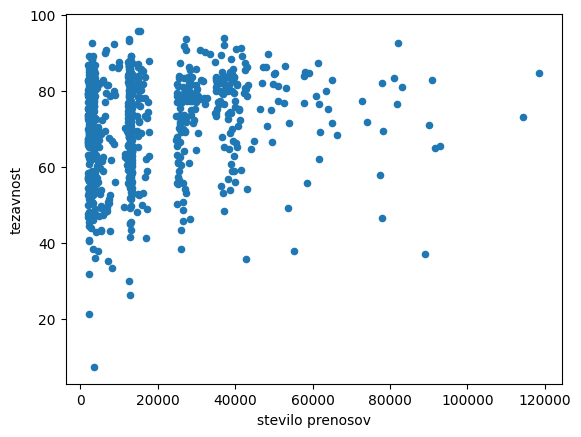

In [125]:
import matplotlib.pyplot as plt
stevilo_prenosov_glede_na_tezavnost.plot.scatter(x="stevilo prenosov", y="tezavnost", title="")


In [126]:
knjige["v_tisoc"] = (knjige["stevilo prenosov"] // 1000)

Graf števila prenosov posamezne knjige glede na njeno težavnost, kjer je enota za število prenosov v tisoč.

<Axes: xlabel='v_tisoc', ylabel='tezavnost'>

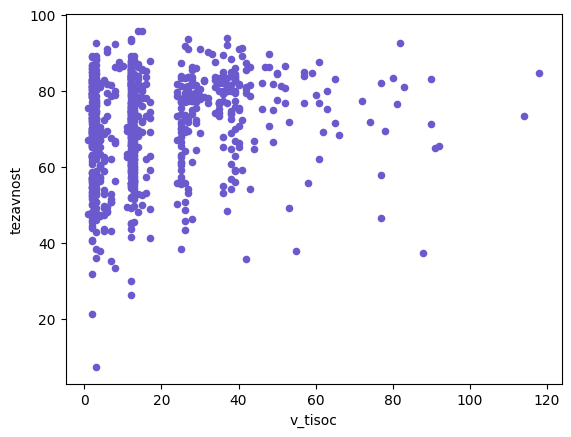

In [127]:
stevilo_prenosov_glede_na_tezavnost = knjige[["v_tisoc", "tezavnost"]]
stevilo_prenosov_glede_na_tezavnost.plot.scatter(color="slateblue", x="v_tisoc", y="tezavnost", title="")

In [128]:
prenosi_po_letih = knjige.groupby("datum objave")["stevilo prenosov"].sum()
prenosi_po_letih

datum objave
1991     14718
1993    199389
1994    692092
1995    265209
1996    465074
         ...  
2021    157062
2022    172861
2023    102440
2024     91217
2025    107977
Name: stevilo prenosov, Length: 34, dtype: Int64

### Različni grafični prikazi odnosa med številom prenosov in letom objave knjige

Graf prikazuje število prenosov v odvisnosti od leta objave knjige.

array([<Axes: xlabel='datum objave'>], dtype=object)

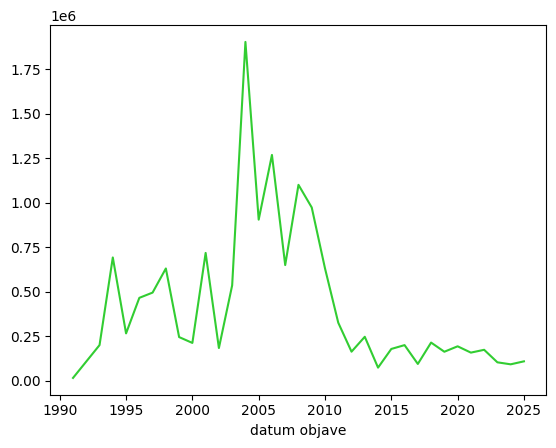

In [129]:
graf = prenosi_po_letih.plot.line(subplots=True, color="limegreen")
graf

Tortni prikaz zgornjega grafa nam prikaže, da je bilo največ prenesenih knjig objavljenih leta 2004.

<Axes: ylabel='prenosi po letih'>

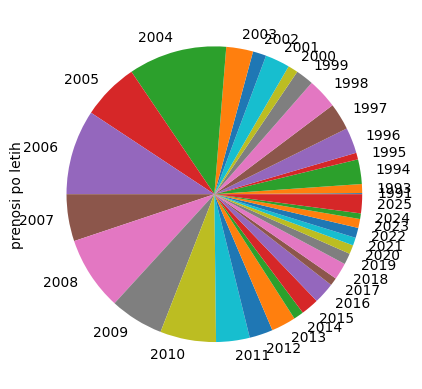

In [130]:
knjige.groupby("datum objave")["stevilo prenosov"].count().plot.pie(ylabel="prenosi po letih")

<Axes: title={'center': 'stevilo prenosov glede na datum objave'}, xlabel='datum objave'>

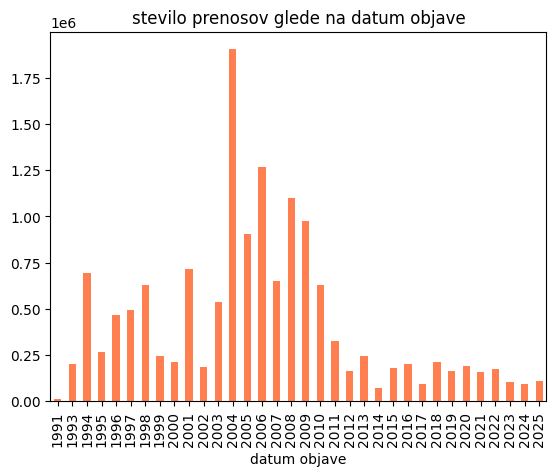

In [131]:
prenosi_po_letih.plot.bar(color="coral", x="datum objave", y="stevilo prenosov", title="stevilo prenosov glede na datum objave")

<Axes: title={'center': 'stevilo prenosov glede na datum objave'}, xlabel='v_tisoc', ylabel='datum objave'>

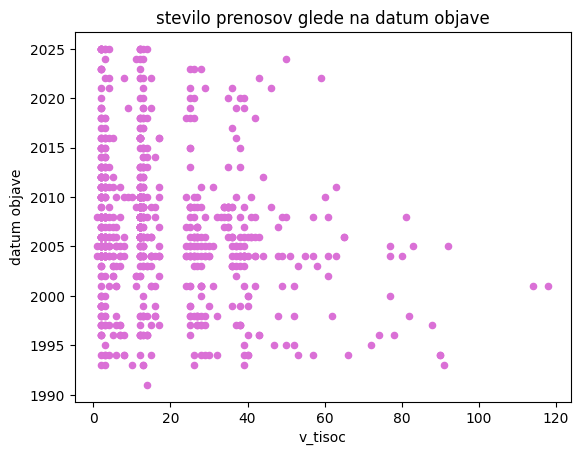

In [132]:
knjige[["datum objave", "v_tisoc"]].plot.scatter(color="orchid", x="v_tisoc", y="datum objave", title="stevilo prenosov glede na datum objave")

Prenosi glede na jezik

<Axes: title={'center': 'stevilo prenosov glede na jezik'}, xlabel='jezik'>

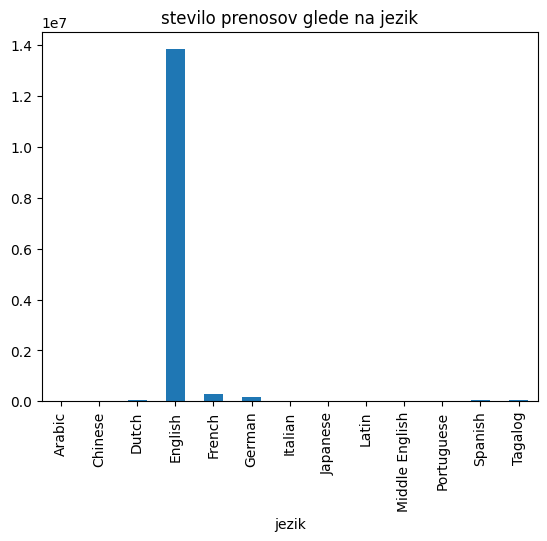

In [133]:
prenosi_jezik = knjige.groupby("jezik")["stevilo prenosov"].sum()
prenosi_jezik.plot.bar(x="jezik", y="stevilo prenosov", title="stevilo prenosov glede na jezik")

Spodnja razpredelnica prikazuje deset knjig z najvišjo težavnostjo.

In [134]:
najtezje = povezano[povezano["vloga"] == "A"].sort_values("tezavnost", ascending=False).head(10)
najtezje


,id knjige,vloga,oseba,naslov,jezik,datum objave,stevilo prenosov,tezavnost
364,67138,A,"Hemingway, Ernest, 1899-1961",The Sun Also Rises,English,2022,15386,95.8
376,75201,A,"Hemingway, Ernest, 1899-1961",A farewell to arms,English,2025,14967,95.8
141,9366,A,"Sinclair, May, 1863-1946",Mary Olivier: a Life,English,2005,37189,94.0
631,30770,A,"Berryman, John, 1919-1988",The Right Time,English,2009,12488,93.7
261,23042,A,"Shakespeare, William, 1564-1616",The TempestThe Works of William Shakespeare [C...,English,2007,27302,93.7
636,41981,A,"Delany, Samuel R., 1942-",The Jewels of Aptor,English,2013,12475,93.1
8,1513,A,"Shakespeare, William, 1564-1616",Romeo and Juliet,English,1998,82087,92.6
694,67098,A,"Milne, A. A. (Alan Alexander), 1882-1956",Winnie-the-Pooh,English,2022,8569,92.3
143,16433,A,"Bailey, Temple, 1869-1953",The Gay Cockade,English,2005,37078,92.0
270,500,A,"Collodi, Carlo, 1826-1890",The Adventures of Pinocchio,English,2006,26772,91.9


<Axes: title={'center': 'najtezje knjige'}, xlabel='naslov'>

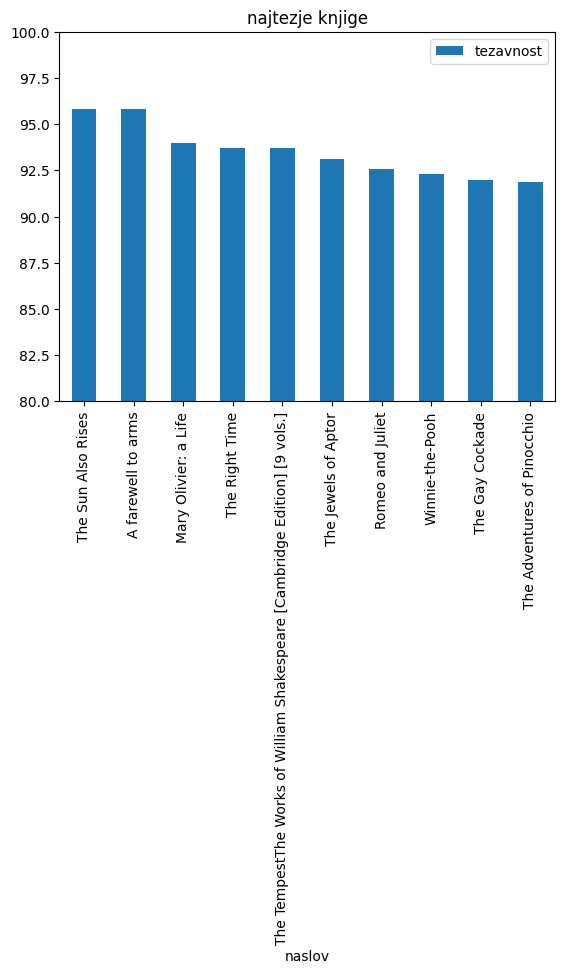

In [135]:
najtezje.plot.bar(x="naslov", y="tezavnost", title="najtezje knjige", ylim=(80,100))

<Axes: title={'center': 'splosna tezavnost knjig'}, xlabel='tezavnost', ylabel='stevilo knjig'>

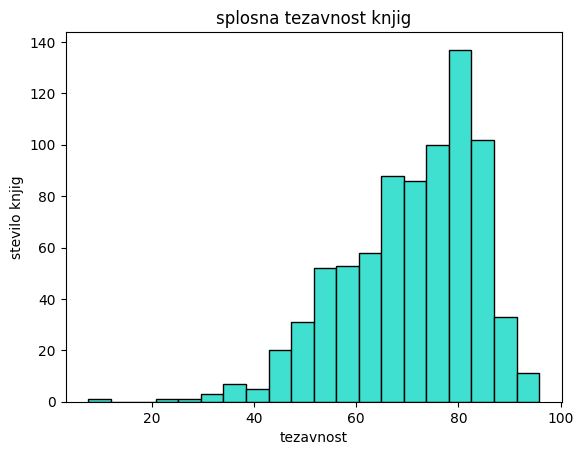

In [136]:

# odstranimo tiste knjige, pri katerih ni težavnosti - NaN
knjige_no_na = knjige.dropna(subset=["tezavnost"])
splosna_tezavnost_knjig = knjige_no_na["tezavnost"].plot(kind="hist", bins=20, color="turquoise", edgecolor="black", xlabel="tezavnost", ylabel="stevilo knjig", title="splosna tezavnost knjig")
splosna_tezavnost_knjig
